In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!unzip "/content/drive/MyDrive/vk_intern_ranking/spam dataset.zip"

Archive:  /content/drive/MyDrive/vk_intern_ranking/spam dataset.zip
  inflating: train_spam.csv          
  inflating: test_spam.csv           


In [ ]:
data = pd.read_csv("train_spam.csv")
data.head()

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...


# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  16278 non-null  object
 1   text       16278 non-null  object
dtypes: object(2)
memory usage: 254.5+ KB


<Axes: >

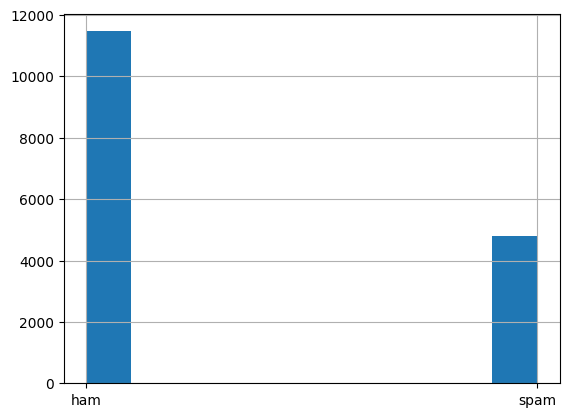

In [ ]:
data["text_type"].hist()

Первые 10 текстов НЕ СПАМ

In [ ]:
from pprint import pprint

for text in data[data["text_type"] == "ham"]["text"].values[:10]:
  pprint(text)

('make sure alex knows his birthday is over in fifteen minutes as far as youre '
 'concerned')
('a resume for john lavorato thanks vince i will get moving on it right away '
 'molly vince j kaminski 02 21 2001 05 55 pm to molly magee hou ect ect cc '
 'vince j kaminski hou ect ect subject a resume for john lavorato molly please '
 'make arrangements for the interview with this candidate for a trading '
 'position interviews with john lavorato jeff shankman gary hickerson stinson '
 'gibner i talked to him in new york and he is considering other opportunities '
 'so we have to act fast i think john will like him more than punit thanks')
('overview of hr associates analyst project per david s request attached is an '
 'overview of the hr associates analysts project creating a human resource '
 'value index this document will provide a brief top line overview of the '
 'following description of the challenges people involved positive outcomes '
 'high level description of the process we s

первые 10 текстов СПАМ

In [ ]:
from pprint import pprint

for text in data[data["text_type"] == "spam"]["text"].values[:10]:
  pprint(text)

('plzz visit my website moviesgodml to get all movies for free and also i '
 'provide direct download links no redirect and ads😊😊😊😊😁')
('urgent your mobile number has been awarded with a £2000 prize guaranteed '
 'call 09061790121 from land line claim 3030 valid 12hrs only 150ppm')
('i am so greatful to mrs valerie dodson for helping change my life she gives '
 'free bitcoins to newly subscribed members and her trading signals are '
 'accurate just click on the link below')
('welcome to jefferson pilot s gateway to wealth as one of the industry s '
 'premier producers you must continually seek qualified cutting edge services '
 'financial profiles concept profiles professional is a personal and business '
 'analysis tool that analyzes a client s insurance investment and financial '
 'planning goals to help them see their situation today compared to their '
 'objectives market profiles professional is an ideal tool for true financial '
 'planning it not only provides a thorough analysis

In [ ]:
print(f'Медианное количество слов в НЕ спаме - {data[data["text_type"] == "ham"]["text"].apply(lambda x: len(x)).median()}')

Медианное количество слов в НЕ спаме - 141.0


<Axes: >

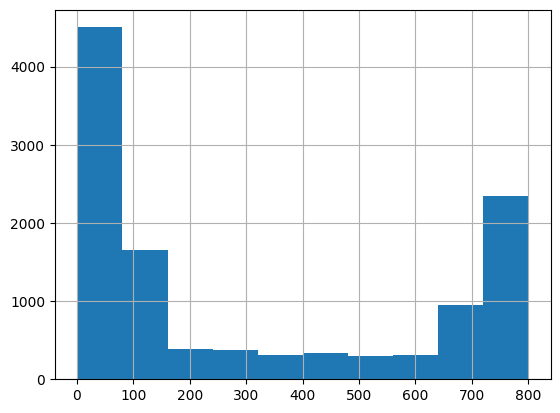

In [ ]:
data[data["text_type"] == "ham"]["text"].apply(lambda x: len(x)).hist()

In [ ]:
print(f'Медианное количество слов в спаме - {data[data["text_type"] == "spam"]["text"].apply(lambda x: len(x)).median()}')

Медианное количество слов в спаме - 195.0


<Axes: >

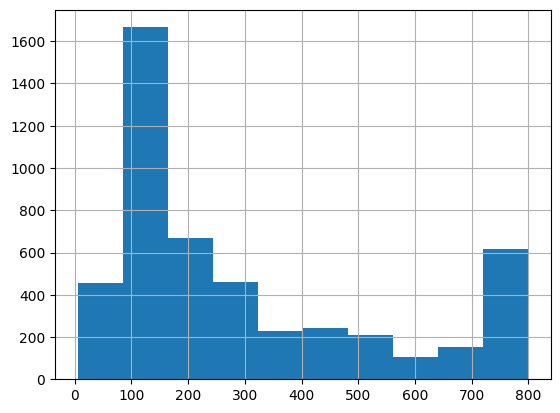

In [ ]:
data[data["text_type"] == "spam"]["text"].apply(lambda x: len(x)).hist()

In [ ]:
!pip install emoji -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 6.4 MB/s eta 0:00:00


In [ ]:
import emoji
import regex

def count_emojis(text):
    emoji_pattern = regex.compile(r"\p{Emoji}")
    return len(emoji_pattern.findall(text))

In [ ]:
print(f'Медианное количество эмодзи в НЕ СПАМ - {data[data["text_type"] == "ham"]["text"].apply(count_emojis).median()}')

Медианное количество эмодзи в НЕ СПАМ - 0.0


<Axes: >

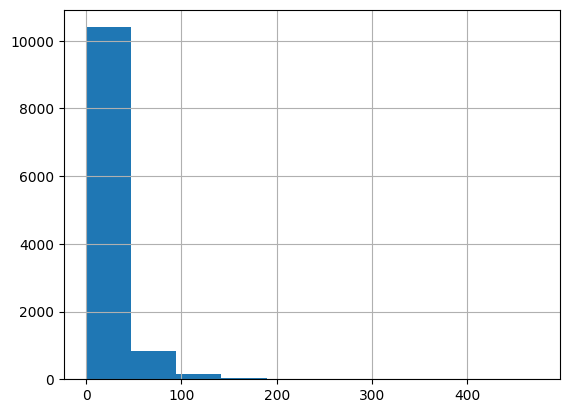

In [ ]:
data[data["text_type"] == "ham"]["text"].apply(count_emojis).hist()

In [ ]:
print(f'Медианное количество эмодзи в СПАМ - {data[data["text_type"] == "spam"]["text"].apply(count_emojis).median()}')

Медианное количество эмодзи в СПАМ - 9.0


<Axes: >

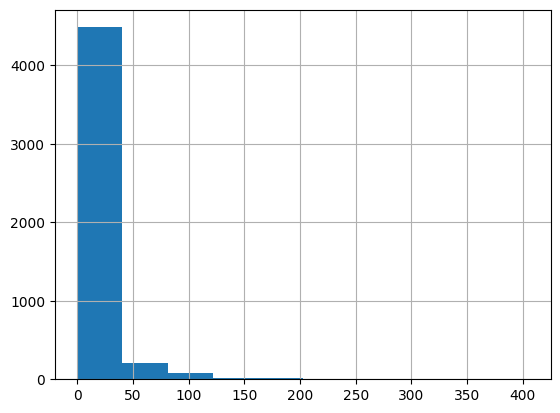

In [ ]:
data[data["text_type"] == "spam"]["text"].apply(count_emojis).hist()

In [ ]:
import string

def count_punctuation(text):
    punctuation_marks = set(string.punctuation)
    return sum(1 for char in text if char in punctuation_marks)

In [ ]:
print(f'Медианное количество знаков препинания в НЕ СПАМ - {data[data["text_type"] == "ham"]["text"].apply(count_punctuation).median()}')

Медианное количество знаков препинания в НЕ СПАМ - 0.0


<Axes: >

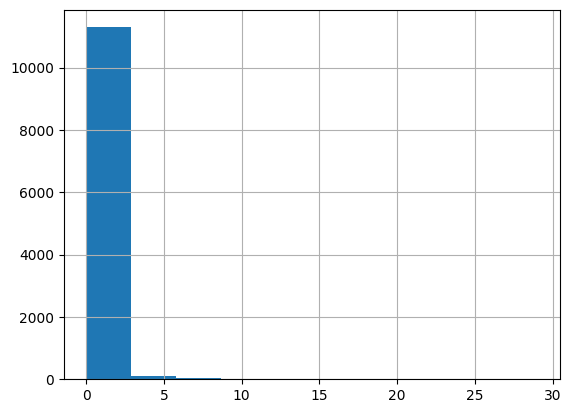

In [ ]:
data[data["text_type"] == "ham"]["text"].apply(count_punctuation).hist()

In [ ]:
print(f'Медианное количество знаков препинания в СПАМ - {data[data["text_type"] == "spam"]["text"].apply(count_punctuation).median()}')

Медианное количество знаков препинания в СПАМ - 0.0


<Axes: >

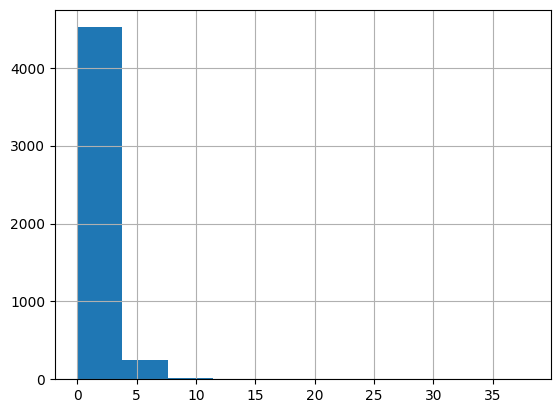

In [ ]:
data[data["text_type"] == "spam"]["text"].apply(count_punctuation).hist()

# Text features with boosting

## text preproccesing

In [ ]:
data["target"] = data["text_type"].apply(lambda x: 1 if x == "spam" else 0)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def prep_text(text):
    table = text.maketrans(dict.fromkeys(string.punctuation))

    words = word_tokenize(text.lower().strip().translate(table))
    lemmed = [WordNetLemmatizer().lemmatize(word) for word in words]

    return " ".join(lemmed)

In [ ]:
data["clean_text"] = data["text"].apply(prep_text)

In [ ]:
data.head()

,text_type,text,target,clean_text
0,ham,make sure alex knows his birthday is over in f...,0,make sure alex know his birthday is over in fi...
1,ham,a resume for john lavorato thanks vince i will...,0,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...,1,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...,1,urgent your mobile number ha been awarded with...
4,ham,overview of hr associates analyst project per ...,0,overview of hr associate analyst project per d...


In [ ]:
data.head()

,text_type,text,target,clean_text
0,ham,make sure alex knows his birthday is over in f...,0,make sure alex know his birthday is over in fi...
1,ham,a resume for john lavorato thanks vince i will...,0,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...,1,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...,1,urgent your mobile number ha been awarded with...
4,ham,overview of hr associates analyst project per ...,0,overview of hr associate analyst project per d...


In [ ]:
!pip install catboost xgboost lightgbm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.0 MB/s eta 0:00:00


## CatBoost + lighgbm

In [ ]:
def from_proba_pred(preds_proba):
  preds = []
  for proba in preds_proba:
    if proba[1] > 0.5:
      preds.append(1)
    else:
      preds.append(0)
  return preds

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(data['clean_text'])
print(train_vectors.shape)

(16278, 50819)


In [ ]:
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

n_splits = 3
kfold = KFold(n_splits=n_splits)

X = data.drop(["text_type", "target"],axis=1)
y = data["target"]

models = []
scores = []
for train_index, test_index in kfold.split(data):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  train_pool = Pool(
      data=X_train.drop(["clean_text"], axis=1),
      label=y_train,
      text_features=["text"]
  )
  test_pool = Pool(
      data=X_test.drop(["clean_text"], axis=1),
      label=y_test,
      text_features=["text"]
  )

  cat = CatBoostClassifier(
      n_estimators=300,

      eval_metric="AUC",
      depth=7,
      use_best_model=True,
      random_state=42,
      early_stopping_rounds=50,

      task_type="GPU",
      thread_count=-1,
      bootstrap_type="Bernoulli",
  )

  lgbm = LGBMClassifier(
      max_depth=5,
      max_bin=1000,
      num_leaves=100,
      objective="binary",
      metric="auc",
  )

  cat.fit(train_pool, eval_set=test_pool, verbose=100)
  lgbm.fit(vectorizer.transform(X_train["clean_text"]), y_train)

  models.append([cat, lgbm])

  preds_cat = cat.predict_proba(X_test.drop(["clean_text"], axis=1))
  preds_lgbm = lgbm.predict_proba(vectorizer.transform(X_test["clean_text"]))

  preds = from_proba_pred((preds_cat + preds_lgbm) / 2)

  scores.append(roc_auc_score(preds, y_test))

Learning rate set to 0.095715


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9480299	best: 0.9480299 (0)	total: 59.2ms	remaining: 17.7s
100:	test: 0.9844177	best: 0.9844452 (94)	total: 1.99s	remaining: 3.93s
200:	test: 0.9856067	best: 0.9856067 (200)	total: 3.35s	remaining: 1.65s
299:	test: 0.9864081	best: 0.9864081 (299)	total: 4.71s	remaining: 0us
bestTest = 0.9864081144
bestIteration = 299
[LightGBM] [Info] Number of positive: 3232, number of negative: 7620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.234386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108513
[LightGBM] [Info] Number of data points in the train set: 10852, number of used features: 2527
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.297825 -> initscore=-0.857675
[LightGBM] [Info] Start training from score -0.857675
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9526823	best: 0.9526823 (0)	total: 72.7ms	remaining: 21.7s
100:	test: 0.9823492	best: 0.9823492 (100)	total: 2.52s	remaining: 4.96s
200:	test: 0.9835755	best: 0.9836096 (189)	total: 3.91s	remaining: 1.92s
299:	test: 0.9846528	best: 0.9846528 (299)	total: 5.25s	remaining: 0us
bestTest = 0.9846527576
bestIteration = 299
[LightGBM] [Info] Number of positive: 3203, number of negative: 7649
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.249207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108850
[LightGBM] [Info] Number of data points in the train set: 10852, number of used features: 2516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.295153 -> initscore=-0.870487
[LightGBM] [Info] Start training from score -0.870487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9535104	best: 0.9535104 (0)	total: 24.9ms	remaining: 7.46s
100:	test: 0.9862498	best: 0.9862498 (100)	total: 1.97s	remaining: 3.88s
200:	test: 0.9872017	best: 0.9872017 (200)	total: 5.21s	remaining: 2.56s
299:	test: 0.9877195	best: 0.9877195 (299)	total: 6.55s	remaining: 0us
bestTest = 0.9877195358
bestIteration = 299
[LightGBM] [Info] Number of positive: 3183, number of negative: 7669
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.244316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107477
[LightGBM] [Info] Number of data points in the train set: 10852, number of used features: 2495
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.293310 -> initscore=-0.879362
[LightGBM] [Info] Start training from score -0.879362
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:
print(scores)
print("-------")
print(np.mean(scores) - np.std(scores))

[0.9609416845191625, 0.9628074203879389, 0.9631635294163805]
-------
0.9613298524655903


In [ ]:
test_data = pd.read_csv("test_spam.csv")
test_data.head()

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...


## sumbission

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        4070 non-null   object
 1   clean_text  4070 non-null   object
dtypes: object(2)
memory usage: 63.7+ KB


In [ ]:
test_data["clean_text"] = test_data["text"].apply(prep_text)

In [ ]:
cat_pred = models[2][0].predict_proba(test_data.drop(["clean_text"], axis=1))
lgbm_pred = models[2][1].predict_proba(vectorizer.transform(test_data["clean_text"]))

predictions = from_proba_pred((cat_pred + lgbm_pred) / 2)

In [ ]:
test_data["target"] = predictions
test_data["text_type"] = test_data["target"].apply(lambda x: "spam" if x == 1 else "ham")

In [ ]:
test_data.head()

,text,clean_text,target,text_type
0,j jim whitehead ejw cse ucsc edu writes j you ...,j jim whitehead ejw cse ucsc edu writes j you ...,0,ham
1,original message from bitbitch magnesium net p...,original message from bitbitch magnesium net p...,0,ham
2,java for managers vince durasoft who just taug...,java for manager vince durasoft who just taugh...,0,ham
3,there is a youtuber name saiman says,there is a youtuber name saiman say,0,ham
4,underpriced issue with high return on equity t...,underpriced issue with high return on equity t...,1,spam


In [ ]:
test_data.drop(["target"], axis=1).to_csv("submission_catboost_lighgbm.csv", index=False)

# transformers

In [ ]:
!pip install simpletransformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 k

In [ ]:
data["text_type"] = data["text_type"].apply(lambda x: 1 if x == "spam" else 0)

In [ ]:
data = data.rename(columns={"text_type": "labels"})
data.head()

,labels,text
0,0,make sure alex knows his birthday is over in f...
1,0,a resume for john lavorato thanks vince i will...
2,1,plzz visit my website moviesgodml to get all m...
3,1,urgent your mobile number has been awarded wit...
4,0,overview of hr associates analyst project per ...


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(["labels"],axis=1)
y = data["labels"]

train, test = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

args = ClassificationArgs(
    overwrite_output_dir=True,
    use_early_stopping=True,
    num_train_epochs=3
)

model = ClassificationModel(
    "distilbert",
    "DunnBC22/distilbert-base-uncased-SpamFilter-LG",
    args=args,
    use_cuda=True,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
from sklearn.metrics import roc_auc_score

model.train_model(train, rocauc=roc_auc_score)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/22 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/1425 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 2 of 3:   0%|          | 0/1425 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/1425 [00:00<?, ?it/s]

(4275, 0.09691487944265555)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test, rocauc=roc_auc_score)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/9 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/49 [00:00<?, ?it/s]

In [ ]:
result["rocauc"]

0.9651313063945443

## submission

In [ ]:
test_data = pd.read_csv("test_spam.csv")
test_data.head()

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...


In [ ]:
predictions, _ = model.predict(test_data["text"].tolist())

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/8 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/41 [00:00<?, ?it/s]

In [ ]:
test_data["target"] = predictions
test_data["text_type"] = test_data["target"].apply(lambda x: "spam" if x == 1 else "ham")

In [ ]:
test_data.head()

,text,target,text_type
0,j jim whitehead ejw cse ucsc edu writes j you ...,0,ham
1,original message from bitbitch magnesium net p...,0,ham
2,java for managers vince durasoft who just taug...,0,ham
3,there is a youtuber name saiman says,0,ham
4,underpriced issue with high return on equity t...,1,spam


In [ ]:
test_data.drop(["target"], axis=1).to_csv("submission_distilbert.csv", index=False)